In [143]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [144]:
#import data into pandas
train_data=pd.read_csv('train.txt',sep=' ',header = None)
train_data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,49.647550,33.575370,12.120255,55.525019,59.667424,48.655833,27.841291,37.671693,29.372885,61.603557,...,49.545031,26.799100,37.478234,22.991726,40.375436,54.282751,55.377480,36.010305,39.601682,1.0
1,32.186724,49.303083,26.144157,50.185549,35.250637,50.152353,28.309090,49.861035,29.419526,54.928607,...,47.364147,37.204230,33.141586,43.289154,47.930928,56.223338,51.794596,37.535402,29.442770,0.0
2,50.527849,40.494637,38.048920,46.160760,42.192538,29.879857,51.837174,50.484946,33.463057,39.968752,...,43.277509,34.451938,41.501669,37.546376,67.145373,40.587152,35.052946,46.928596,68.199559,0.0
3,20.317886,50.551271,43.325413,46.714819,46.070661,25.204793,56.131786,39.509030,42.694093,43.844120,...,41.084533,36.651456,77.064527,23.138650,43.166518,27.196714,35.357738,52.509325,39.480603,0.0
4,42.786827,46.552778,29.977697,43.952371,78.084230,57.121656,28.070137,44.151037,96.274285,32.826287,...,24.354419,40.104489,33.004923,28.733771,33.756176,62.872634,38.268475,56.336674,37.689786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,45.144444,23.455054,59.165270,58.870748,37.828947,46.197904,31.220951,19.750510,34.310324,47.530716,...,37.013224,25.148334,33.044309,46.174713,43.923713,57.344054,50.505656,41.796220,45.711453,0.0
1662,25.764977,54.358390,33.241198,44.707271,41.085282,42.685399,50.958397,61.667418,27.143179,29.851433,...,48.925340,55.391046,33.237688,37.509467,45.216049,41.964317,30.617238,71.009537,61.781565,1.0
1663,46.225286,57.852474,20.160533,59.192148,27.798815,30.228503,48.254692,22.312661,24.440230,38.240191,...,26.969233,49.766653,43.769517,36.359110,31.269858,33.721603,39.474587,56.860678,42.044680,1.0
1664,67.260014,26.574990,33.019673,38.552314,31.122328,39.369573,26.062286,66.022281,26.871273,37.860716,...,55.396821,40.311469,42.639655,49.648895,45.313200,37.665594,39.547350,21.285083,37.558859,0.0


In [145]:
train_data.shape

(1666, 101)

In [146]:
y=train_data[100]
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1661    0.0
1662    1.0
1663    1.0
1664    0.0
1665    0.0
Name: 100, Length: 1666, dtype: float64

In [147]:
x=train_data.drop(100,axis=1)
x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,49.647550,33.575370,12.120255,55.525019,59.667424,48.655833,27.841291,37.671693,29.372885,61.603557,...,31.069362,49.545031,26.799100,37.478234,22.991726,40.375436,54.282751,55.377480,36.010305,39.601682
1,32.186724,49.303083,26.144157,50.185549,35.250637,50.152353,28.309090,49.861035,29.419526,54.928607,...,41.255210,47.364147,37.204230,33.141586,43.289154,47.930928,56.223338,51.794596,37.535402,29.442770
2,50.527849,40.494637,38.048920,46.160760,42.192538,29.879857,51.837174,50.484946,33.463057,39.968752,...,51.046738,43.277509,34.451938,41.501669,37.546376,67.145373,40.587152,35.052946,46.928596,68.199559
3,20.317886,50.551271,43.325413,46.714819,46.070661,25.204793,56.131786,39.509030,42.694093,43.844120,...,38.436187,41.084533,36.651456,77.064527,23.138650,43.166518,27.196714,35.357738,52.509325,39.480603
4,42.786827,46.552778,29.977697,43.952371,78.084230,57.121656,28.070137,44.151037,96.274285,32.826287,...,20.298445,24.354419,40.104489,33.004923,28.733771,33.756176,62.872634,38.268475,56.336674,37.689786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,45.144444,23.455054,59.165270,58.870748,37.828947,46.197904,31.220951,19.750510,34.310324,47.530716,...,44.261854,37.013224,25.148334,33.044309,46.174713,43.923713,57.344054,50.505656,41.796220,45.711453
1662,25.764977,54.358390,33.241198,44.707271,41.085282,42.685399,50.958397,61.667418,27.143179,29.851433,...,40.451044,48.925340,55.391046,33.237688,37.509467,45.216049,41.964317,30.617238,71.009537,61.781565
1663,46.225286,57.852474,20.160533,59.192148,27.798815,30.228503,48.254692,22.312661,24.440230,38.240191,...,40.188377,26.969233,49.766653,43.769517,36.359110,31.269858,33.721603,39.474587,56.860678,42.044680
1664,67.260014,26.574990,33.019673,38.552314,31.122328,39.369573,26.062286,66.022281,26.871273,37.860716,...,42.904807,55.396821,40.311469,42.639655,49.648895,45.313200,37.665594,39.547350,21.285083,37.558859


In [148]:
x.shape,y.shape

((1666, 100), (1666,))

In [149]:
# Scale our data using StandardScaler:
standardscaler = StandardScaler()
X = standardscaler.fit_transform(x)

In [150]:
correlation=train_data.corr()[100]
correlation

0      0.024093
1      0.037893
2      0.015386
3     -0.011941
4      0.011628
         ...   
96    -0.011885
97    -0.009115
98    -0.011668
99     0.024246
100    1.000000
Name: 100, Length: 101, dtype: float64

In [151]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features.head(10)

100    1.000000
40     0.841680
29     0.240716
66     0.074746
30     0.053820
21     0.048333
52     0.046109
46     0.045947
53     0.043747
35     0.043695
Name: 100, dtype: float64

In [152]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best=SelectKBest(score_func=f_classif,k=2)

X_new=k_best.fit_transform(x,y)
selected_indices=k_best.get_support(indices=True)
selected_features= train_data.columns[selected_indices]
selected_features

Index([29, 40], dtype='int64')

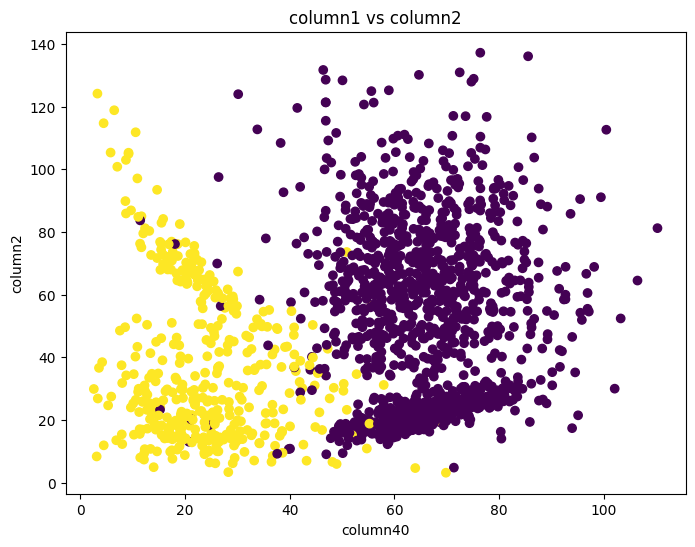

In [153]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data.iloc[:, 40], train_data.iloc[:, 29], c=y)
plt.xlabel('column40')
plt.ylabel('column2')
plt.title('column1 vs column2')
plt.show()


In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Columns: 101 entries, 0 to 100
dtypes: float64(101)
memory usage: 1.3 MB


In [155]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,...,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,41.789146,42.325431,41.438719,41.595017,42.218898,41.890934,42.462021,42.309844,39.030340,42.117886,...,42.115709,41.985450,42.215874,42.325745,41.993733,41.810917,42.295220,41.842071,42.456321,0.246098
std,13.107376,13.316249,12.754379,13.015599,12.735725,12.835232,12.852033,13.051811,25.997514,12.888691,...,12.943889,12.685114,12.830829,12.859235,12.772191,12.853493,12.688147,12.715008,13.041834,0.430866
min,7.720632,8.447803,8.030881,11.257383,6.120383,8.661367,10.287872,5.567145,2.813265,7.417020,...,7.607699,6.255753,7.976966,10.226728,5.300876,9.564166,11.623012,11.353162,12.568946,0.000000
25%,32.097752,32.650206,32.563633,32.161717,33.194281,32.941712,33.286164,32.905098,20.015015,32.915511,...,32.977426,33.091820,33.207884,33.181401,33.063673,32.519429,32.952884,32.899636,33.069174,0.000000
50%,41.011512,41.593260,40.467043,40.588947,41.168002,40.642343,41.565930,41.451075,28.432078,41.348286,...,41.169388,40.984127,41.284556,41.388562,40.920936,40.718556,41.031991,40.136468,41.467763,0.000000
75%,50.565659,50.615715,48.896903,49.891929,50.417334,50.087265,49.866782,50.145091,55.806528,50.394855,...,50.288072,50.874379,50.145743,50.728442,50.243671,50.392130,50.419924,49.967870,50.620327,0.000000
max,96.528338,91.814573,109.554790,86.923816,92.291748,102.448514,100.522577,92.073708,162.201222,106.786468,...,92.044823,83.643219,90.957290,88.882903,92.086958,90.799999,98.474723,97.609538,92.628484,1.000000


In [156]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 101, dtype: int64

In [157]:
indices_to_extract = [40, 29, 66, 30, 21]
selected_rows = x.loc[:, x.columns.intersection(indices_to_extract)]
selected_rows.shape

(1666, 5)

In [158]:
x=selected_rows
y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1661    0.0
1662    1.0
1663    1.0
1664    0.0
1665    0.0
Name: 100, Length: 1666, dtype: float64

In [159]:
# Split our data between a training set and a test set:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,
                                                    stratify=y, random_state=66)

In [160]:
x_train.shape,x_test.shape

((1249, 5), (417, 5))

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [162]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('RandomForestClassifier',RandomForestClassifier(n_estimators=100, random_state=29)))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier(max_depth=5, random_state=29)))
models.append(('SVM',SVC(kernel='linear', random_state=29)))

models

[('LogisticRegression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('RandomForestClassifier', RandomForestClassifier(random_state=29)),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(max_depth=5, random_state=29)),
 ('SVM', SVC(kernel='linear', random_state=29))]

In [163]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [164]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train, y_train)
# Make predictions on the test data
    y_pred = model.predict(x_test)
    
    print("confusion matrix",confusion_matrix(y_test,y_pred))   
    print('\n') 
    print("accuracy",accuracy_score(y_test,y_pred)) 
    print('\n')   
    print("precision",precision_score(y_test,y_pred))
    print('\n') 
    print("recall",recall_score(y_test,y_pred))
    print('\n') 
    print("f1score",f1_score(y_test,y_pred))
    auc=sklearn.metrics.roc_auc_score(y_test,y_pred)
    print("auc",auc)
    print('--------------------------------------------------------') 

LogisticRegression LogisticRegression()

confusion matrix [[310   4]
 [  5  98]]


accuracy 0.9784172661870504


precision 0.9607843137254902


recall 0.9514563106796117


f1score 0.9560975609756097
auc 0.9693587285882135
--------------------------------------------------------
Naive Bayes GaussianNB()

confusion matrix [[310   4]
 [  5  98]]


accuracy 0.9784172661870504


precision 0.9607843137254902


recall 0.9514563106796117


f1score 0.9560975609756097
auc 0.9693587285882135
--------------------------------------------------------
KNN KNeighborsClassifier()

confusion matrix [[309   5]
 [  3 100]]


accuracy 0.9808153477218226


precision 0.9523809523809523


recall 0.970873786407767


f1score 0.9615384615384616
auc 0.9774751097643931
--------------------------------------------------------
RandomForestClassifier RandomForestClassifier(random_state=29)

confusion matrix [[309   5]
 [  7  96]]


accuracy 0.9712230215827338


precision 0.9504950495049505


recall 0.9320388349514563

In [165]:
KNeighborsClassifier=KNeighborsClassifier()

In [166]:
n_neighbors=[int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]
parameters = dict(n_neighbors = n_neighbors)
parameters

{'n_neighbors': [1, 2, 3, 4, 5]}

In [167]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(KNeighborsClassifier, parameters)
clf.fit(x_train,y_train)
print('score : ' , clf.best_score_)
print('params : ' , clf.best_params_)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


score :  0.9703807228915663
params :  {'n_neighbors': 5}


In [168]:
y_pred = clf.best_estimator_.predict(x_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1.

In [169]:
    print("confusion matrix",confusion_matrix(y_test,y_pred))   
    print('\n') 
    print("accuracy",accuracy_score(y_test,y_pred)) 
    print('\n')   
    print("precision",precision_score(y_test,y_pred))
    print('\n') 
    print("recall",recall_score(y_test,y_pred))
    print('\n') 
    print("f1score",f1_score(y_test,y_pred))
    auc=sklearn.metrics.roc_auc_score(y_test,y_pred)
    print("auc",auc)
    print('--------------------------------------------------------') 

confusion matrix [[309   5]
 [  3 100]]


accuracy 0.9808153477218226


precision 0.9523809523809523


recall 0.970873786407767


f1score 0.9615384615384616
auc 0.9774751097643931
--------------------------------------------------------


KNN KNeighborsClassifier()

confusion matrix [[309   5]
 [  3 100]]


accuracy 0.9808153477218226


precision 0.9523809523809523


recall 0.970873786407767


f1score 0.9615384615384616
auc 0.9774751097643931

#profosser
auc,precision,recall,accuracy
0.9926814748882156 0.9739336492890995 0.9716312056737588 0.9861944777911165


In [170]:
np.savetxt('cg_submission.txt',y_pred)

In [171]:

random_search = RandomizedSearchCV(KNeighborsClassifier,param_distributions=parameters,n_iter=1,cv=5,random_state=42)

In [172]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5]},
                   random_state=42)

In [173]:
random_search.best_params_

{'n_neighbors': 2}

In [174]:
y_pred = random_search.best_estimator_.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1.

In [175]:
    print("confusion matrix",confusion_matrix(y_test,y_pred))   
    print('\n') 
    print("accuracy",accuracy_score(y_test,y_pred)) 
    print('\n')   
    print("precision",precision_score(y_test,y_pred))
    print('\n') 
    print("recall",recall_score(y_test,y_pred))
    print('\n') 
    print("f1score",f1_score(y_test,y_pred))
    auc=sklearn.metrics.roc_auc_score(y_test,y_pred)
    print("auc",auc)
    print('--------------------------------------------------------') 

confusion matrix [[310   4]
 [ 10  93]]


accuracy 0.9664268585131894


precision 0.9587628865979382


recall 0.9029126213592233


f1score 0.9299999999999999
auc 0.9450868839280193
--------------------------------------------------------


In [176]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 1213 to 163
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   21      417 non-null    float64
 1   29      417 non-null    float64
 2   30      417 non-null    float64
 3   40      417 non-null    float64
 4   66      417 non-null    float64
dtypes: float64(5)
memory usage: 19.5 KB


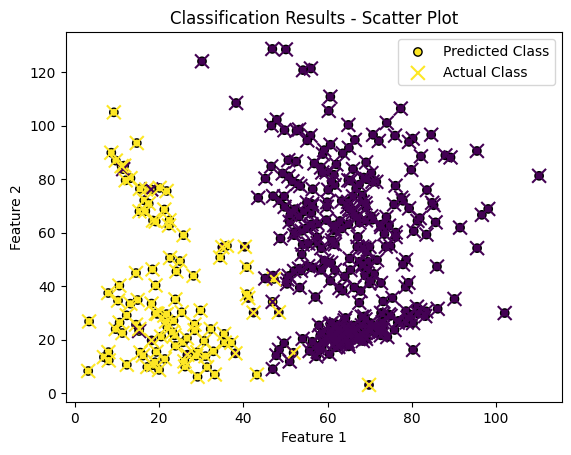

In [177]:
# Visualize the classification in a scatter plot
plt.scatter(X_test[40], X_test[29], c=y_pred, cmap='viridis', edgecolors='k', marker='o', label='Predicted Class')
plt.scatter(X_test[40], X_test[29], c=y_test, cmap='viridis', marker='x', s=100, label='Actual Class')
plt.title('Classification Results - Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [180]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the val data
y_pred1 = rf_classifier.predict(x_test)


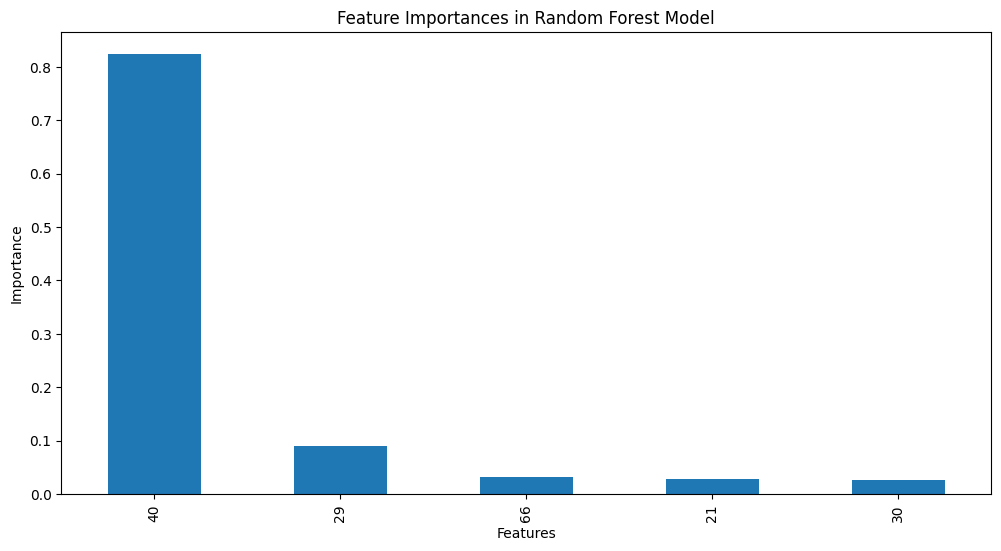

In [181]:
# Extract feature importances
importances = rf_classifier.feature_importances_

# Convert to a pandas Series for convenience
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort the features by importance
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Visualizing the feature importances
plt.figure(figsize=(12,6))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()